# Learning Structured Predictors

In this class, we will continue to focus on sequence classification, but instead of following a generative ap- proach (like in the previous chapter) we move towards discriminative approaches. Recall that the difference between these approaches is that generative approaches attempt to model the probability distribution of the data, P(X, Y), whereas discriminative ones only model the conditional probability of the sequence, given the observed data, P(Y|X).

In this class, we will continue to focus on sequence classification, but instead of following a generative ap- proach (like in the previous chapter) we move towards discriminative approaches. 

<b> Exercise 4.1 </b> In this exercise you will train a CRF using different feature sets for Part-of-Speech Tagging. Start with the code below, which uses the ID feature set from table 4.2.

In [2]:
import lxmls.sequences.crf_online as crfo
import lxmls.sequences.structured_perceptron as spc
import lxmls.readers.pos_corpus as pcc
import lxmls.sequences.id_feature as idfc
import lxmls.sequences.extended_feature as exfc
print "CRF Exercise"
corpus = pcc.PostagCorpus()
train_seq = corpus.read_sequence_list_conll("data/train-02-21.conll",max_sent_len=10,
    max_nr_sent=1000)
test_seq = corpus.read_sequence_list_conll("data/test-23.conll",max_sent_len=10,
    max_nr_sent=1000)
dev_seq = corpus.read_sequence_list_conll("data/dev-22.conll",max_sent_len=10,max_nr_sent
    =1000)
feature_mapper = idfc.IDFeatures(train_seq)
feature_mapper.build_features()
crf_online = crfo.CRFOnline(corpus.word_dict, corpus.tag_dict, feature_mapper)
crf_online.num_epochs = 20
crf_online.train_supervised(train_seq)

CRF Exercise
Epoch: 0 Objective value: -5.779018
Epoch: 1 Objective value: -3.192724
Epoch: 2 Objective value: -2.717537
Epoch: 3 Objective value: -2.436614
Epoch: 4 Objective value: -2.240491
Epoch: 5 Objective value: -2.091833
Epoch: 6 Objective value: -1.973353
Epoch: 7 Objective value: -1.875643
Epoch: 8 Objective value: -1.793034
Epoch: 9 Objective value: -1.721857
Epoch: 10 Objective value: -1.659605
Epoch: 11 Objective value: -1.604499
Epoch: 12 Objective value: -1.555229
Epoch: 13 Objective value: -1.510806
Epoch: 14 Objective value: -1.470468
Epoch: 15 Objective value: -1.433612
Epoch: 16 Objective value: -1.399759
Epoch: 17 Objective value: -1.368518
Epoch: 18 Objective value: -1.339566
Epoch: 19 Objective value: -1.312636


> You will receive feedback when each epoch is finished, note that running the 20 epochs might take a while. After training is done, evaluate the learned model on the training, development and test sets.

In [3]:
pred_train = crf_online.viterbi_decode_corpus(train_seq)
pred_dev = crf_online.viterbi_decode_corpus(dev_seq)
pred_test = crf_online.viterbi_decode_corpus(test_seq)
eval_train = crf_online.evaluate_corpus(train_seq, pred_train)
eval_dev = crf_online.evaluate_corpus(dev_seq, pred_dev)
eval_test = crf_online.evaluate_corpus(test_seq, pred_test)
print "CRF - ID Features Accuracy Train: %.3f Dev: %.3f Test: %.3f"%(eval_train,eval_dev, eval_test)

CRF - ID Features Accuracy Train: 0.949 Dev: 0.846 Test: 0.858


> Even using a similar feature set a CRF yields better results than the HMM from the previous lecture. Perform some error analysis and figure out what are the main errors the tagger is making. Compare them with the errors made by the HMM model. (Hint: use the methods developed in the previous lecture to help you with the error analysis).

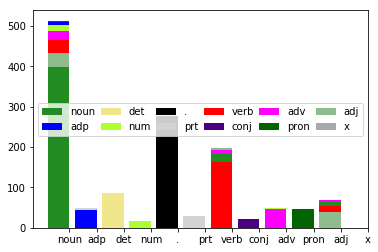

In [8]:
import lxmls.sequences.confusion_matrix as cm
import matplotlib.pyplot as plt
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, pred_test, len(
corpus.tag_dict), crf_online.get_num_states())
cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(crf_online.get_num_states
    ()), 'Confusion matrix')
plt.show()

<b> Exercise 4.2 </b> 

Repeat the previous exercise using the extended feature set. Compare the results.

In [13]:
feature_mapper = exfc.ExtendedFeatures(train_seq)
feature_mapper.build_features()
crf_online = crfo.CRFOnline(corpus.word_dict, corpus.tag_dict, feature_mapper)
crf_online.num_epochs = 20
crf_online.train_supervised(train_seq)

Epoch: 0 Objective value: -7.141596
Epoch: 1 Objective value: -1.807511
Epoch: 2 Objective value: -1.218877
Epoch: 3 Objective value: -0.955739
Epoch: 4 Objective value: -0.807821
Epoch: 5 Objective value: -0.712858
Epoch: 6 Objective value: -0.647382
Epoch: 7 Objective value: -0.599442
Epoch: 8 Objective value: -0.562584
Epoch: 9 Objective value: -0.533411
Epoch: 10 Objective value: -0.509885
Epoch: 11 Objective value: -0.490548
Epoch: 12 Objective value: -0.474318
Epoch: 13 Objective value: -0.460438
Epoch: 14 Objective value: -0.448389
Epoch: 15 Objective value: -0.437800
Epoch: 16 Objective value: -0.428402
Epoch: 17 Objective value: -0.419990
Epoch: 18 Objective value: -0.412406
Epoch: 19 Objective value: -0.405524


In [15]:
pred_train = crf_online.viterbi_decode_corpus(train_seq)
pred_dev = crf_online.viterbi_decode_corpus(dev_seq)
pred_test = crf_online.viterbi_decode_corpus(test_seq)
eval_train = crf_online.evaluate_corpus(train_seq, pred_train)
eval_dev = crf_online.evaluate_corpus(dev_seq, pred_dev)
eval_test = crf_online.evaluate_corpus(test_seq, pred_test)
print "CRF - Extended Features Accuracy Train: %.3f Dev: %.3f Test: %.3f"%(eval_train, eval_dev,eval_test)

CRF - Extended Features Accuracy Train: 0.984 Dev: 0.899 Test: 0.894


> Compare the errors obtained with the two different feature sets. Do some error analysis: what errors were correct by using more features? Can you think of other features to use to solve the errors found?

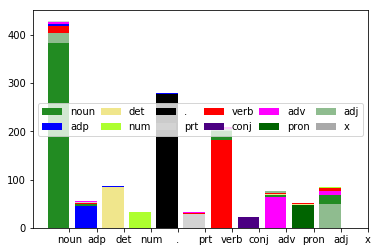

In [16]:
import lxmls.sequences.confusion_matrix as cm
import matplotlib.pyplot as plt
confusion_matrix = cm.build_confusion_matrix(test_seq.seq_list, pred_test, len(
corpus.tag_dict), crf_online.get_num_states())
cm.plot_confusion_bar_graph(confusion_matrix, corpus.tag_dict, xrange(crf_online.get_num_states
    ()), 'Confusion matrix')
plt.show()

In [ ]:
> Compare the errors obtained with the two different feature sets. Do some error analysis: what errors were correct by using more features? Can you think of other features to use to solve the errors found